# WeatherPy
----

#### Analysis
* It is clear from the temperature chart that the temperature does indeed get higher as you approach the equator, with the highest current temperatures exhibiting around the range of +20° to +30° latitude.

* Latitude seems to have no visible effect on wind speed. The majority of wind speeds are in the 0-15 mph range.

* Latitude also seems to have no significant effect on cloudiness or humidity. Although around 0° latitude, the humidity seems to cluster around 60-100%.

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key

api_key = 'fc13d9f6ab3c9f2edef50aea529070a2'

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [30]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
data = {'City' : [], 'Country' : [], 'Date' : [], 'Lat': [], 'Long' : [], 'Max Temp (°F)' : [], 
        "Humidity (%)" : [], 'Cloudiness (%)' : [], 'Wind Speed (mph)' : []}

url = "http://api.openweathermap.org/data/2.5/weather?appid=fc13d9f6ab3c9f2edef50aea529070a2&units=imperial&q="

print('Beginning Data Retrieval')
print('-----------------------------')

for i in range(len(cities)):
    try:
        r = requests.get(url + str(cities[i])).json()
        print(f'Processing Record {i} | {cities[i]}')
        data['City'].append(r['name'])
        data['Country'].append(r['sys']['country'])
        data['Date'].append(r['dt'])
        data['Lat'].append(r['coord']['lat'])
        data['Long'].append(r['coord']['lon'])
        data['Max Temp (°F)'].append(r['main']['temp_max'])
        data['Humidity (%)'].append(r['main']['humidity'])
        data['Cloudiness (%)'].append(r['clouds']['all'])
        data['Wind Speed (mph)'].append(r['wind']['speed'])
    
    except KeyError:
        print('City not found. Skipping...')

Beginning Data Retrieval
-----------------------------
Processing Record 0 | geraldton
Processing Record 1 | bengkulu
City not found. Skipping...
Processing Record 2 | codrington
Processing Record 3 | bluff
Processing Record 4 | jamestown
Processing Record 5 | ruatoria
City not found. Skipping...
Processing Record 6 | bardiyah
City not found. Skipping...
Processing Record 7 | butaritari
Processing Record 8 | samusu
City not found. Skipping...
Processing Record 9 | hohhot
Processing Record 10 | avera
Processing Record 11 | fougamou
Processing Record 12 | busselton
Processing Record 13 | port elizabeth
Processing Record 14 | new norfolk
Processing Record 15 | upernavik
Processing Record 16 | passo de camaragibe
Processing Record 17 | hasaki
Processing Record 18 | hobart
Processing Record 19 | ushuaia
Processing Record 20 | carnarvon
Processing Record 21 | caravelas
Processing Record 22 | hilo
Processing Record 23 | rikitea
Processing Record 24 | berlevag
Processing Record 25 | gulabpura


Processing Record 226 | elizabeth city
Processing Record 227 | bar harbor
Processing Record 228 | hokitika
Processing Record 229 | kangaatsiaq
Processing Record 230 | sabang
Processing Record 231 | tiksi
Processing Record 232 | jalu
Processing Record 233 | rawson
Processing Record 234 | port-gentil
Processing Record 235 | inongo
Processing Record 236 | westport
Processing Record 237 | mamallapuram
Processing Record 238 | sataua
City not found. Skipping...
Processing Record 239 | college
Processing Record 240 | gazli
Processing Record 241 | rezina
Processing Record 242 | sitka
Processing Record 243 | ipora
City not found. Skipping...
Processing Record 244 | sur
Processing Record 245 | lebu
Processing Record 246 | faanui
Processing Record 247 | taoudenni
Processing Record 248 | palabuhanratu
City not found. Skipping...
Processing Record 249 | saskylakh
Processing Record 250 | sabha
Processing Record 251 | price
Processing Record 252 | birobidzhan
Processing Record 253 | shigony
Processin

Processing Record 456 | srednekolymsk
Processing Record 457 | artyk
City not found. Skipping...
Processing Record 458 | kigoma
Processing Record 459 | havre-saint-pierre
Processing Record 460 | filadelfia
Processing Record 461 | znamenskoye
Processing Record 462 | nicoya
Processing Record 463 | alta floresta
Processing Record 464 | falealupo
City not found. Skipping...
Processing Record 465 | palmer
Processing Record 466 | santa maria
Processing Record 467 | upington
Processing Record 468 | lorengau
Processing Record 469 | lata
Processing Record 470 | faya
Processing Record 471 | kansanshi
Processing Record 472 | alotau
City not found. Skipping...
Processing Record 473 | sorvag
City not found. Skipping...
Processing Record 474 | bathsheba
Processing Record 475 | yangambi
Processing Record 476 | cockburn town
Processing Record 477 | kendari
Processing Record 478 | sioux lookout
Processing Record 479 | slave lake
Processing Record 480 | samalaeulu
City not found. Skipping...
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [36]:
df = pd.DataFrame(data)
df.head()

,City,Country,Date,Lat,Long,Max Temp (°F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Geraldton,CA,1562334104,49.72,-86.95,68.00,88,5,4.70
1,Codrington,AU,1562334104,-28.95,153.24,64.40,93,40,5.21
2,Bluff,AU,1562334104,-23.58,149.07,58.93,89,95,24.47
3,Jamestown,AU,1562333960,-33.21,138.60,58.03,66,70,14.81
4,Butaritari,KI,1562334105,3.07,172.79,84.67,68,93,4.56


In [41]:
df.to_csv('City Weather Data.csv', index = False, header = True)
df.count()

City                530
Country             530
Date                530
Lat                 530
Long                530
Max Temp (°F)       530
Humidity (%)        530
Cloudiness (%)      530
Wind Speed (mph)    530
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

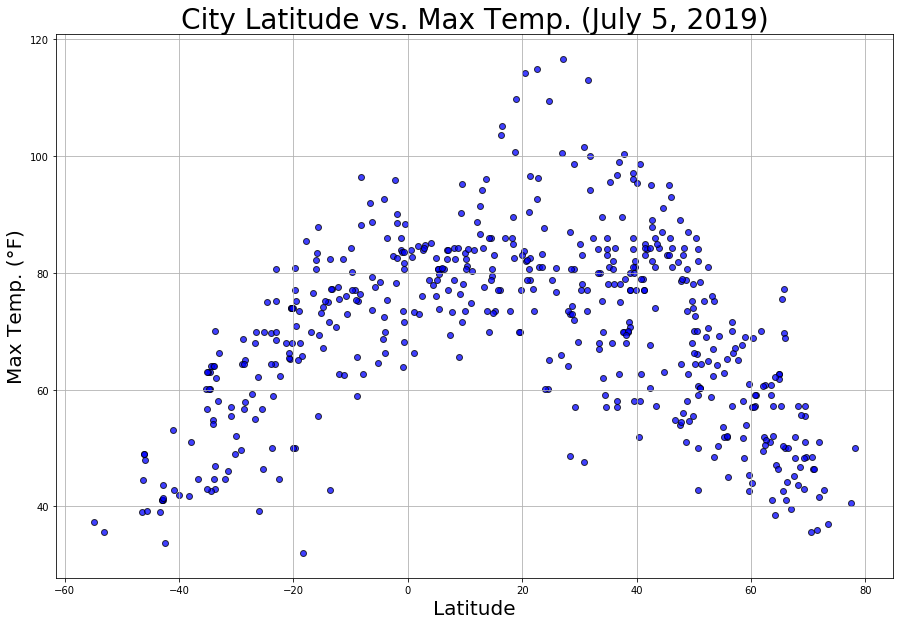

In [50]:
# Set figure size (in order to enlargen) and add gridlines

plt.figure(figsize = (15, 10))
plt.grid()

# Plot temp data from dataframe

plt.scatter(df['Lat'], df['Max Temp (°F)'], marker = 'o', facecolors = 'b', edgecolors = 'black', alpha = 0.75)

# Add labels for x-axis, y-axis, and plot title

plt.xlabel('Latitude', fontsize = 20)
plt.ylabel('Max Temp. (°F)', fontsize = 20)
plt.title('City Latitude vs. Max Temp. (July 5, 2019)', fontsize = 28)

# Save Figure

plt.savefig('City Latitude vs. Max Temp. (July 5, 2019).png')

#### Latitude vs. Humidity Plot

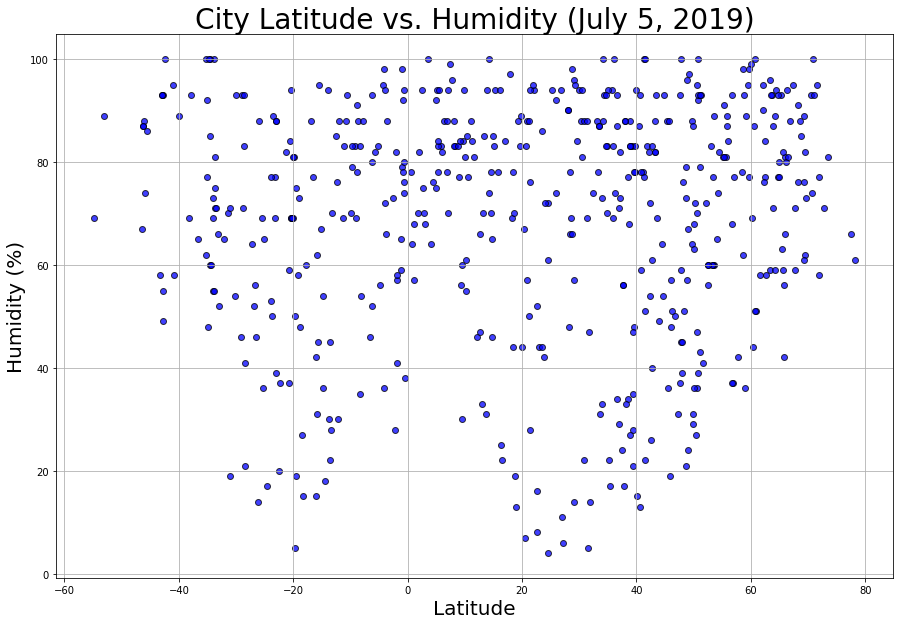

In [52]:
# Set figure size (in order to enlargen) and add gridlines

plt.figure(figsize = (15, 10))
plt.grid()

# Plot humidity data from dataframe

plt.scatter(df['Lat'], df['Humidity (%)'], marker = 'o', facecolors = 'b', edgecolors = 'black', alpha = 0.75)

# Add labels for x-axis, y-axis, and plot title

plt.xlabel('Latitude', fontsize = 20)
plt.ylabel('Humidity (%)', fontsize = 20)
plt.title('City Latitude vs. Humidity (July 5, 2019)', fontsize = 28)

# Save Figure

plt.savefig('City Latitude vs. Humidity (July 5, 2019).png')

#### Latitude vs. Cloudiness Plot

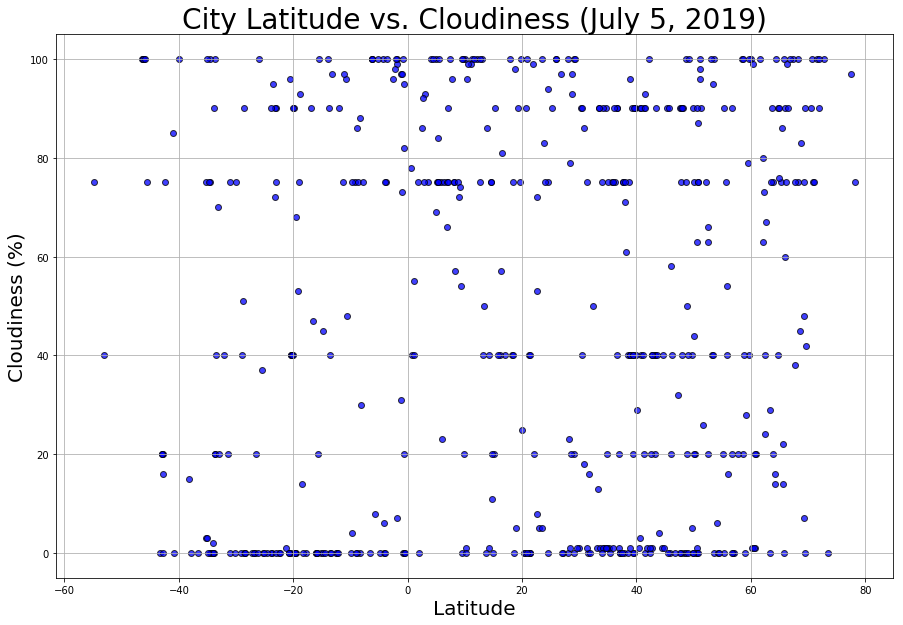

In [53]:
# Set figure size (in order to enlargen) and add gridlines

plt.figure(figsize = (15, 10))
plt.grid()

# Plot cloudiness data from dataframe

plt.scatter(df['Lat'], df['Cloudiness (%)'], marker = 'o', facecolors = 'b', edgecolors = 'black', alpha = 0.75)

# Add labels for x-axis, y-axis, and plot title

plt.xlabel('Latitude', fontsize = 20)
plt.ylabel('Cloudiness (%)', fontsize = 20)
plt.title('City Latitude vs. Cloudiness (July 5, 2019)', fontsize = 28)

# Save Figure

plt.savefig('City Latitude vs. Cloudiness (July 5, 2019).png')

#### Latitude vs. Wind Speed Plot

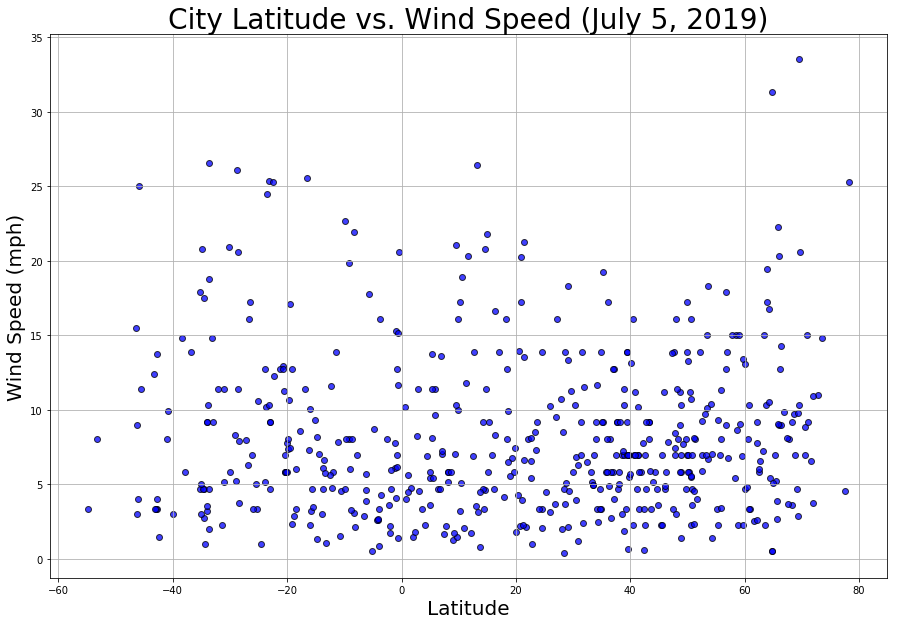

In [54]:
# Set figure size (in order to enlargen) and add gridlines

plt.figure(figsize = (15, 10))
plt.grid()

# Plot wind speed data from dataframe

plt.scatter(df['Lat'], df['Wind Speed (mph)'], marker = 'o', facecolors = 'b', edgecolors = 'black', alpha = 0.75)

# Add labels for x-axis, y-axis, and plot title

plt.xlabel('Latitude', fontsize = 20)
plt.ylabel('Wind Speed (mph)', fontsize = 20)
plt.title('City Latitude vs. Wind Speed (July 5, 2019)', fontsize = 28)

# Save Figure

plt.savefig('City Latitude vs. Wind Speed (July 5, 2019).png')